<a href="https://colab.research.google.com/github/Batman511/Numerical_methods_5sem/blob/main/%D0%A7%D0%B8%D1%81%D0%BB%D0%B0%D0%BA%D0%B8_2%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Численное дифференцирование

In [6]:
def function(x):
  # return np.arctan( np.sin(x) )
  return (np.sin(x))**2
def deriv_function(x):
  # return np.cos(x)/2
  return np.sin(2*x)
def deriv2_function(x):
  # return np.sin(x)/(-2)
  return 2*np.cos( 2*x )
def deriv3_function(x):
  # return np.sin(x)/(-2)
  return -4*np.sin( 2*x )

    start_x   start_y        y'
0     -1.50  0.994996 -0.141120
1     -1.45  0.985479 -0.239249
2     -1.40  0.971111 -0.334988
3     -1.35  0.952036 -0.427380
4     -1.30  0.928444 -0.515501
..      ...       ...       ...
56     1.30  0.928444  0.515501
57     1.35  0.952036  0.427380
58     1.40  0.971111  0.334988
59     1.45  0.985479  0.239249
60     1.50  0.994996  0.141120

[61 rows x 3 columns]
Равномерный шаг =  0.04999999999999982


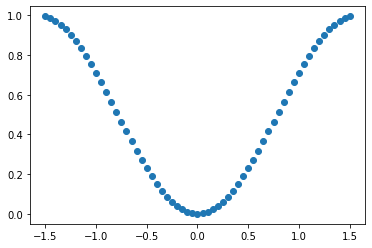

In [26]:
START = -1.5
FINISH = 1.5

# если хотим задать h
h = 0.05
N = int((FINISH-START)//h)+2

start_x = np.linspace(START, FINISH, N)
start_y = function( start_x )

real_y1 = deriv_function(start_x) 
real_y2 = deriv2_function(start_x)
real_y3 = deriv3_function(start_x)

df = pd.DataFrame({'start_x': start_x, 'start_y': start_y, "y'": real_y1})
print(df)

ax = plt.subplot()
ax.scatter(start_x, start_y, marker='o')

# шаг
h = start_x[3] - start_x[2]
print("Равномерный шаг = ",h)

## Первые производные функции в узлах

In [8]:
# Первая производная, используя правые разности
def first_right(start_y,h):
  der1right_y = []
  n = len(start_y)

  for i in range(n):
    if i==(n-1):
      der1right_y.append( (start_y[i] - start_y[i-1])/h )  
    else:
      der1right_y.append( (start_y[i+1] - start_y[i])/h )

  return der1right_y

# Первая производная, используя центральные разности
def first_mid(start_y,h):
  der1mid_y = []
  n = len(start_y)
  
  for i in range(n):
    if i==(n-1):
      der1mid_y.append( ( 3*start_y[i] - 4*start_y[i-1] + start_y[i-2])/(2*h) )  
    elif i==0:
      der1mid_y.append( ( -3*start_y[i] + 4*start_y[i+1] - start_y[i+2])/(2*h) )  
    else:
      der1mid_y.append( (start_y[i+1] - start_y[i-1])/(2*h) )

  return der1mid_y

Графики производной функции

Absolute Loss_right =  0.031266401712653005
Absolute Loss_mid   =  0.0011055945177290975


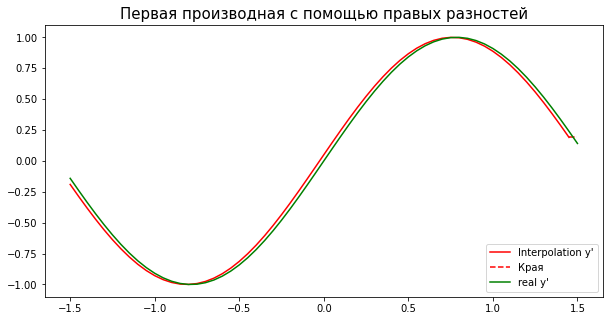

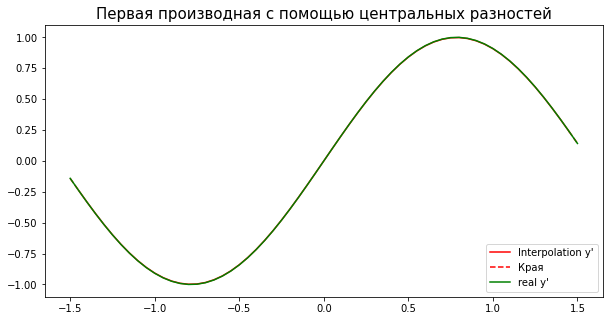

In [9]:
loss_right = 0
der1right_y = first_right(start_y,h)
for i in range(len(start_x)):
    loss_right += abs(real_y1[i]-der1right_y[i])
print("Absolute Loss_right = ", loss_right/ len(start_x))

fig = plt.figure(figsize=(10,5))

ax_real = fig.add_subplot()
ax_real.set_title("Первая производная с помощью правых разностей", fontsize=15)
ax_real.plot(start_x[:N-1], der1right_y[:N-1],c='red', label="Interpolation y'")
ax_real.plot(start_x[N-2:], der1right_y[N-2:],c='red',ls='--', label="Края")
ax_real.plot(start_x, real_y1,c='green', label="real y'")
ax_real.legend(loc='lower right')

#---------------------------------------------------------------------------

loss_mid = 0
der1mid_y = first_mid(start_y,h)
for i in range(len(start_x)):
    loss_mid += abs(real_y1[i]-der1mid_y[i])
print("Absolute Loss_mid   = ", loss_mid/ len(start_x))

fig = plt.figure(figsize=(10,5))

ax_real = fig.add_subplot()
ax_real.set_title("Первая производная с помощью центральных разностей", fontsize=15)
ax_real.plot(start_x[1:N-1], der1mid_y[1:N-1],c='red', label="Interpolation y'")
ax_real.plot(start_x[N-2:], der1mid_y[N-2:],c='red',ls='--', label="Края")
ax_real.plot(start_x[:2], der1mid_y[:2],c='red',ls='--')
ax_real.plot(start_x, real_y1,c='green', label="real y'")
ax_real.legend(loc='lower right')

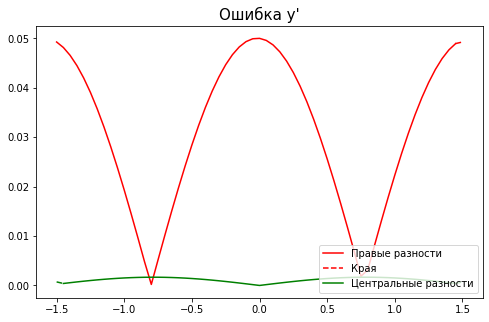

In [10]:
fig = plt.figure(figsize=(8,5))

loss_right = []
loss_mid = []
for i in range(len(start_x)):
    loss_right.append(abs(real_y1[i]-der1right_y[i]))
    loss_mid.append(abs(real_y1[i]-der1mid_y[i]))

ax_real = fig.add_subplot()
ax_real.set_title("Ошибка y'", fontsize=15)
ax_real.plot(start_x[:N-1], loss_right[:N-1],c='red', label="Правые разности")
ax_real.plot(start_x[N-2:], loss_right[N-2:],c='red',ls='--', label="Края")

ax_real.plot(start_x[1:N-1], loss_mid[1:N-1],c='green', label="Центральные разности")
ax_real.plot(start_x[N-2:], loss_mid[N-2:],c='green',ls='--')
ax_real.plot(start_x[:2], loss_mid[:2],c='green',ls='--')
ax_real.legend(loc='lower right')

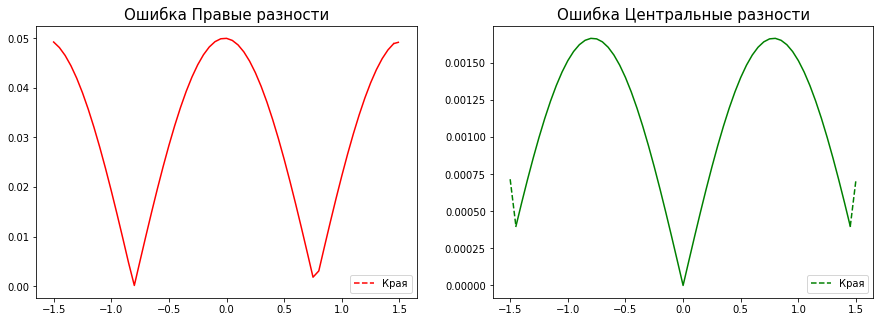

In [11]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
ax.set_title("Ошибка Правые разности", fontsize=15)
ax.plot(start_x[:N-1], loss_right[:N-1],c='red', linewidth=1.5)
ax.plot(start_x[N-2:], loss_right[N-2:],c='red',ls='--', linewidth=1.5,label="Края")
ax.legend(loc='lower right')

ax = fig.add_subplot(1,2,2)
ax.set_title("Ошибка Центральные разности", fontsize=15)
ax.plot(start_x[1:N-1], loss_mid[1:N-1],c='green', linewidth=1.5)
ax.plot(start_x[0:2], loss_mid[0:2],c='green',ls='--', linewidth=1.5,label="Края")
ax.plot(start_x[N-2:], loss_mid[N-2:],c='green',ls='--', linewidth=1.5)
ax.legend(loc='lower right')

## Вторые производные второго и четвертого порядка точности

In [12]:
def second_2x(start_y,h):
  der2mid_y_2x = []
  n = len(start_y)

  for i in range(n):
    if i==0:
      der2mid_y_2x.append( (2*start_y[i] - 5*start_y[i+1] + 4*start_y[i+2] - start_y[i+3])/(h**2) )
    elif i==n-1:
      der2mid_y_2x.append( ( 2*start_y[i] - 5*start_y[i-1] + 4*start_y[i-2] - 1*start_y[i-3])/(h**2) ) 
    else:
      der2mid_y_2x.append( (start_y[i-1] - 2*start_y[i] + start_y[i+1]) /(h**2) )
  
  return der2mid_y_2x

def second_4x(start_y,h):
  der2mid_y_4x = []
  n = len(start_y)
  
  for i in range(n):
    if i==0 or i==1:
      der2mid_y_4x.append( (15/4*start_y[i] - 77/6*start_y[i+1] + 107/6*start_y[i+2] - 13*start_y[i+3] + 61/12*start_y[i+4] - 5/6*start_y[i+5] )/(h**2) )
    elif i==n-1 or i==n-2:
      der2mid_y_4x.append( ( 15/4*start_y[i] - 77/6*start_y[i-1] + 107/6*start_y[i-2] - 13*start_y[i-3] + 61/12*start_y[i-4] - 5/6*start_y[i-5])/(h**2) ) 
    else:
      der2mid_y_4x.append( (- 1/12*start_y[i-2] + 4/3*start_y[i-1] - 5/2*start_y[i] + 4/3*start_y[i+1] - 1/12*start_y[i+2])/h**2 )

  return der2mid_y_4x

def third_2x(start_y,h):
  der3mid_y_2x = []
  n = len(start_y)
  
  for i in range(n):
    if i==0 or i==1:
      der3mid_y_2x.append( (-5/2*start_y[i] + 9*start_y[i+1] - 12*start_y[i+2] + 7*start_y[i+3] - 3/2*start_y[i+4] )/(h**3) )
    elif i==n-1 or i==n-2:
      der3mid_y_2x.append( ( 3/2*start_y[i-4] - 7*start_y[i-3] + 12*start_y[i-2] - 9*start_y[i-1] + 5/2*start_y[i])/(h**3) ) 
    else:
      der3mid_y_2x.append( (- 1/2*start_y[i-2] + start_y[i-1]  - start_y[i+1] + 1/2*start_y[i+2])/h**3 )

  return der3mid_y_2x  

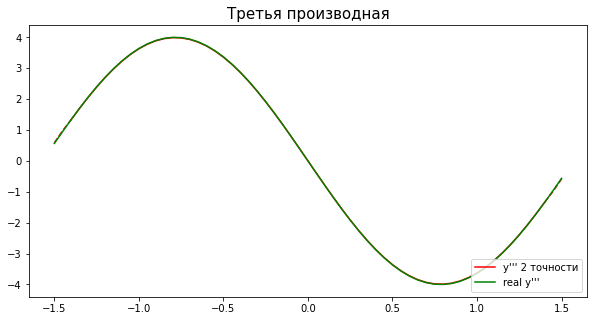

In [13]:
der3mid_y_2x = third_2x(start_y,h)

fig = plt.figure(figsize=(10,5))

ax_real = fig.add_subplot()
ax_real.set_title("Третья производная", fontsize=15)
ax_real.plot(start_x[2:N-2], der3mid_y_2x[2:N-2],c='red', label="y''' 2 точности")
ax_real.plot(start_x[0:3], der3mid_y_2x[0:3],c='red',ls='--')
ax_real.plot(start_x[N-3:], der3mid_y_2x[N-3:],c='red',ls='--')
ax_real.plot(start_x, real_y3,c='green', label="real y'''")
ax_real.legend(loc='lower right')


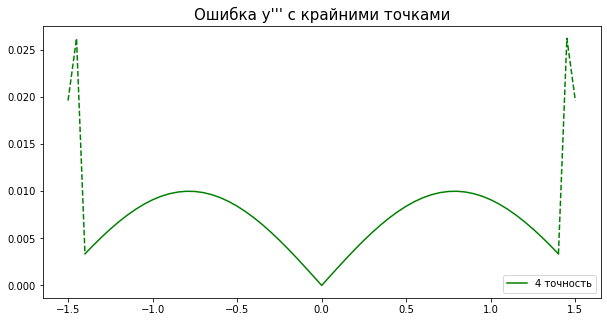

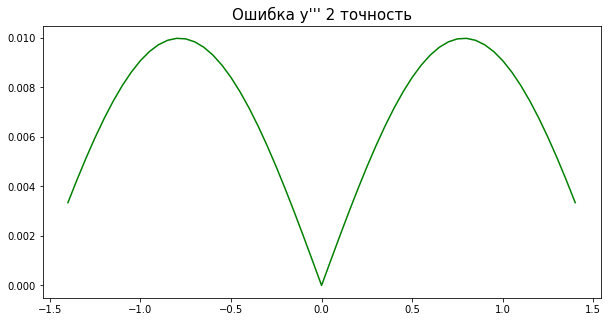

In [14]:
loss_3_2x = []
for i in range(len(start_x)):
    loss_3_2x.append(abs(real_y3[i]-der3mid_y_2x[i]))

fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("Ошибка y''' с крайними точками", fontsize=15)
ax_real.plot(start_x[2:N-2], loss_3_2x[2:N-2],c='green', label="4 точность")
ax_real.plot(start_x[0:3], loss_3_2x[0:3],c='green',ls='--')
ax_real.plot(start_x[N-3:], loss_3_2x[N-3:],c='green',ls='--')
ax_real.legend(loc='lower right')


fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("Ошибка y''' 2 точность", fontsize=15)
ax_real.plot(start_x[2:N-2], loss_3_2x[2:N-2],c='green')

In [16]:
def max_loss(predict, real):
  loss = 0
  for i in range(len(predict)):
    if loss < np.abs(real[i]-predict[i]):
      loss = np.abs(real[i]-predict[i])
  return loss

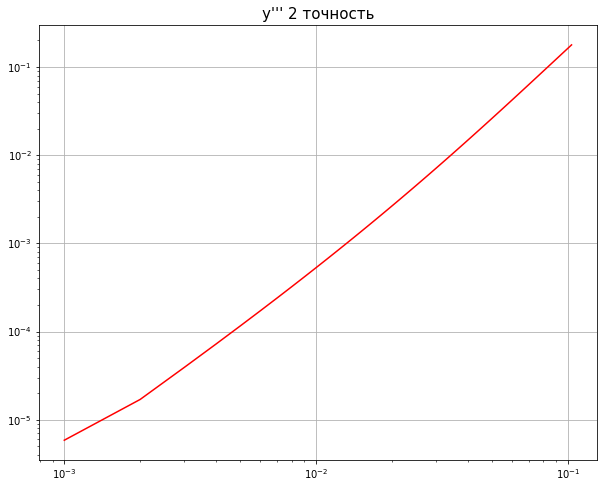

In [24]:
hrange = np.arange(0.001,0.1,0.001)
loss_ = []
step = []

for i in range(len(hrange)):
  hh = hrange[i]
  n = int((FINISH - START)//hh)
  start_xx = np.linspace(START, FINISH, n)
  hh = start_xx[3]-start_xx[2]

  start_y = function( start_xx )

  step.append( hh )
  loss_.append( max_loss( third_2x(start_y,hh)[:n-1], deriv3_function(start_xx)[:n-1]) )


fig = plt.figure(figsize=(10,8))
ax_1 = fig.add_subplot()
ax_1.plot(step, loss_, 'r')
ax_1.set_title("y''' 2 точность", fontsize=15)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')  

Absolute Loss_mid_2p =  0.0015702397820680503
Absolute Loss_mid_4p =  1.0410581463197805e-05


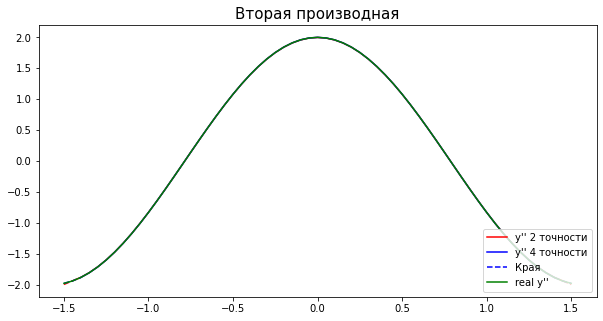

In [27]:
loss_mid_2p = 0
loss_mid_4p = 0
der2mid_y_2x = second_2x(start_y,h)
der2mid_y_4x = second_4x(start_y,h)
for i in range(len(start_x)):
    loss_mid_2p += abs(real_y2[i]-der2mid_y_2x[i])
    loss_mid_4p += abs(real_y2[i]-der2mid_y_4x[i])
print("Absolute Loss_mid_2p = ", loss_mid_2p/ len(start_x))
print("Absolute Loss_mid_4p = ", loss_mid_4p/ len(start_x))

fig = plt.figure(figsize=(10,5))

ax_real = fig.add_subplot()
ax_real.set_title("Вторая производная", fontsize=15)
ax_real.plot(start_x[1:N-1], der2mid_y_2x[1:N-1],c='red', label="y'' 2 точности")
ax_real.plot(start_x[0:2], der2mid_y_2x[0:2],c='red',ls='--')
ax_real.plot(start_x[N-2:], der2mid_y_2x[N-2:],c='red',ls='--')

ax_real.plot(start_x[2:N-2], der2mid_y_4x[2:N-2],c='blue', label="y'' 4 точности")
ax_real.plot(start_x[0:3], der2mid_y_4x[0:3],c='blue',ls='--',label="Края")
ax_real.plot(start_x[N-3:], der2mid_y_4x[N-3:],c='blue',ls='--')

ax_real.plot(start_x, real_y2,c='green', label="real y''")
ax_real.legend(loc='lower right')

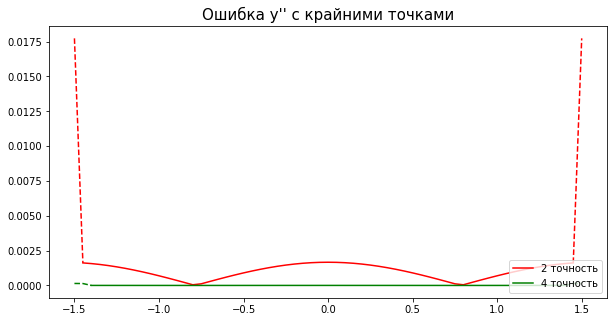

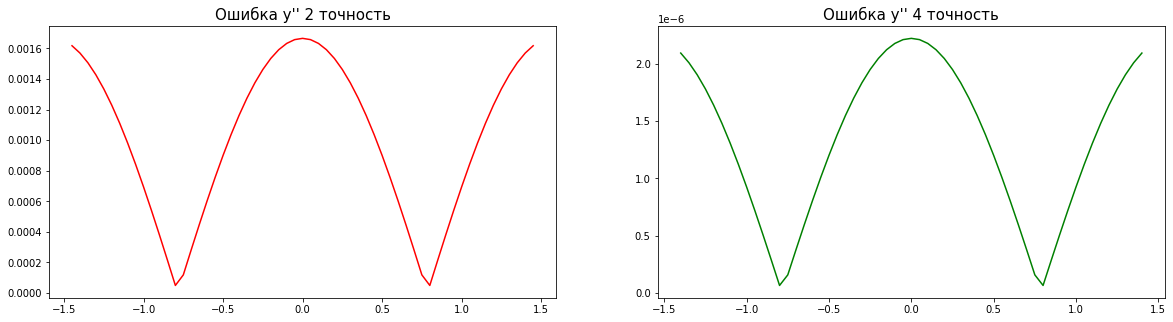

In [28]:
fig = plt.figure(figsize=(10,5))

loss_y_2x = []
loss_y_4x = []
for i in range(len(start_x)):
    loss_y_2x.append(abs(real_y2[i]-der2mid_y_2x[i]))
    loss_y_4x.append(abs(real_y2[i]-der2mid_y_4x[i]))

ax_real = fig.add_subplot()
ax_real.set_title("Ошибка y'' с крайними точками", fontsize=15)
ax_real.plot(start_x[1:N-1], loss_y_2x[1:N-1],c='red', label="2 точность")
ax_real.plot(start_x[0:2], loss_y_2x[0:2],c='red',ls='--')
ax_real.plot(start_x[N-2:], loss_y_2x[N-2:],c='red',ls='--')
ax_real.plot(start_x[2:N-2], loss_y_4x[2:N-2],c='green', label="4 точность")
ax_real.plot(start_x[0:3], loss_y_4x[0:3],c='green',ls='--')
ax_real.plot(start_x[N-3:], loss_y_4x[N-3:],c='green',ls='--')
ax_real.legend(loc='lower right')


fig = plt.figure(figsize=(20,5))
ax_real = fig.add_subplot(1,2,1)
ax_real.set_title("Ошибка y'' 2 точность", fontsize=15)
ax_real.plot(start_x[1:N-1], loss_y_2x[1:N-1],c='red')

ax_real = fig.add_subplot(1,2,2)
ax_real.set_title("Ошибка y'' 4 точность", fontsize=15)
ax_real.plot(start_x[2:N-2], loss_y_4x[2:N-2],c='green')

# Функция ошибки от шага

In [ ]:
def max_loss(predict, real):
  loss = 0
  for i in range(len(predict)):
    if loss < np.abs(real[i]-predict[i]):
      loss = np.abs(real[i]-predict[i])
  return loss

In [29]:
loss_right_1 = []
loss_mid_1 = []
loss_2mid_2 = []
loss_2mid_4 = []
step=[]

hrange = np.arange(0.001,0.1,0.001)
for i in range(len(hrange)):
  hh = hrange[i]
  n = int((FINISH - START)//hh)
  start_xx = np.linspace(START, FINISH, n)
  hh = start_xx[3]-start_xx[2]

  start_y = function( start_xx )

  step.append( hh )
  loss_right_1.append( max_loss( first_right(start_y,hh)[:n-1], deriv_function(start_xx)[:n-1]) )
  loss_mid_1.append( max_loss( first_mid(start_y,hh)[1:n-1], deriv_function(start_xx)[1:n-1]) )
  loss_2mid_2.append( max_loss( second_2x(start_y,hh)[1:n-1], deriv2_function(start_xx)[1:n-1]) )
  loss_2mid_4.append( max_loss( second_4x(start_y,hh)[2:n-2], deriv2_function(start_xx)[2:n-2]) )


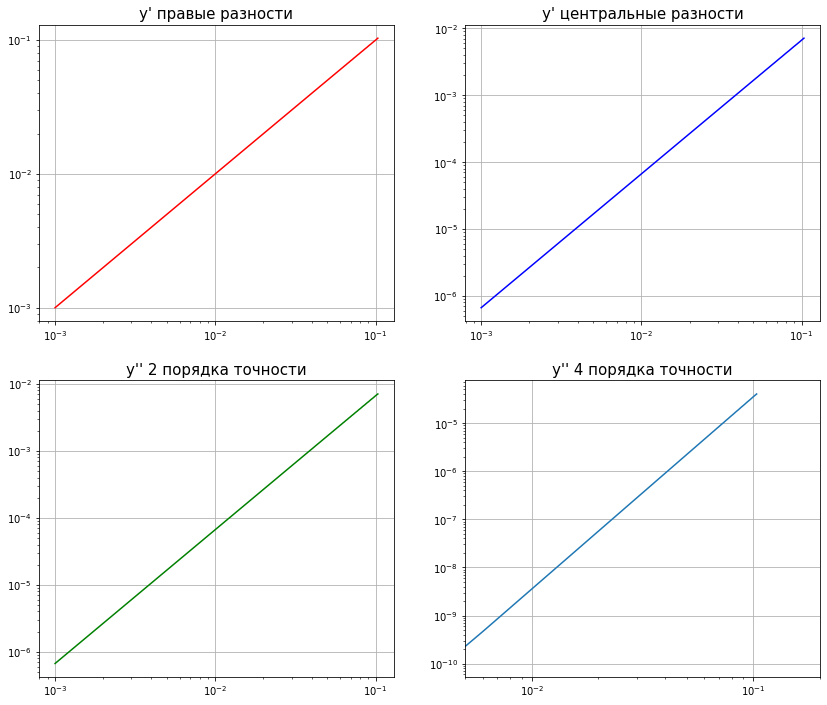

In [30]:
fig = plt.figure(figsize=(14,12))

ax_1 = fig.add_subplot(2,2,1)
ax_1.plot(step, loss_right_1, 'r')
ax_1.set_title("y' правые разности", fontsize=15)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')

ax_2 = fig.add_subplot(2,2,2)
ax_2.plot(step, loss_mid_1, 'b')
ax_2.set_title("y' центральные разности", fontsize=15)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')

ax_3 = fig.add_subplot(2,2,3)
ax_3.plot(step, loss_2mid_2, 'g')
ax_3.set_title("y'' 2 порядка точности", fontsize=15)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')

ax_4 = fig.add_subplot(2,2,4)
ax_4.plot(step, loss_2mid_4)
ax_4.set_title("y'' 4 порядка точности", fontsize=15)
ax_4.set(xlim=(5*10**-3, 2*10**-1))
plt.grid(True)
plt.yscale('log')
plt.xscale('log')